<a href="https://colab.research.google.com/github/JaimeWilson/Redes_Neurais_Data_science/blob/main/%5BJAIMEWILSON%5DRedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais
## Prática I - Classificação de padrões

## Base de dados: Breast Cancer

In [8]:
#Import básico
import numpy as np 
import pandas as pd 
import json
import matplotlib.pyplot as plt 
import seaborn as sns 

#Preenchendo Registros Faltantes utilizando o Imputer
from sklearn.impute import SimpleImputer

#Para o modelo de Redes Neurais
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense     #Camada Fully Connected
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

#Para avaliação dos resultados e pré-processamento.
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

#Para a avaliação dos datasets
from tensorflow.keras.datasets import mnist

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
def piecewise_norm(vec,val,n):
    assert val > min(vec)
    
    return np.where(vec < val, n*(vec - min(vec))/(val - min(vec)), (1-n)*(vec - val)/(max(vec) - val) + n)

In [10]:
def transform_data(dataset,dataset_columns,normalize=True):
    new_df = pd.DataFrame()
    for name in dataset.columns:
        if name in dataset_columns.keys():
            
            if dataset_columns[name] == 'categorical':
                raw_data = dataset[name].values
                d_encoder = LabelEncoder()
                d_encoder.fit(raw_data)
                d_encoded = d_encoder.transform(raw_data)
                dummy_y = to_categorical(d_encoded)
                #print(dummy_y.shape)
                
                for (j,k) in enumerate(d_encoder.classes_):
                    new_df[f'{name}_{k}'] = dummy_y[:,j].astype('int')
            
            
            elif dataset_columns[name] == 'numeric':
                raw_data = dataset[name].values
                if normalize:
                    new_df[name] = (raw_data - min(raw_data))/(max(raw_data) - min(raw_data))
                else:
                    new_df[name] = raw_data
                
            elif dataset_columns[name] == 'original':
                new_df[name] = dataset[name].values
            
            elif dataset_columns[name] == 'target':
                new_df[name] = dataset[name].values
                
    return new_df

In [11]:
def create_model(hidden_neurons = [4], hidden_activation = ['relu'], output_activation='softmax', lr = 0.05, n_input = 1, n_output = 1):
    # create model
    model = Sequential()
    model.add(Dense(hidden_neurons[0], input_dim=n_input, activation='relu'))
    for i in range(1,len(hidden_neurons)):
        model.add(Dense(hidden_neurons[i], input_dim=hidden_neurons[i-1], activation='relu'))
        

    model.add(Dense(n_output, activation=output_activation))
    # Compile model
    opt = Adam(lr=lr)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [5]:
#model = Sequential()
#model.add(Dense(2, input_dim=2, activation='relu'))

In [6]:
#model = create_model(hidden_neurons=[80], lr=0.1)

In [7]:
#model.summary()

# Preparação dos dados

In [12]:
with open('/content/drive/MyDrive/Python para Analise de Dados/ENG1456 (ICA)/1 - Redes Neurais/04-06 Apresenta├º├úo do trabalho 1/pratica1 - classificacao/Breast Cancer/data_info.json','r') as f:
    dataset_columns = json.load(f)

In [13]:
dataset = pd.read_csv('/content/drive/MyDrive/Python para Analise de Dados/ENG1456 (ICA)/1 - Redes Neurais/04-06 Apresenta├º├úo do trabalho 1/pratica1 - classificacao/Breast Cancer/class_breast.csv')

## Parte I - Compreensão do problema e análise de variáveis



### 1)	Observe a base de dados do problema. Existem variáveis que podem ser eliminadas do dataset? Justifique.

#### Rascunho

In [14]:
dataset # ver a planilha completa

,ID,radius,texture,perimeter,area,smoothness,compacity,concavity,pts_concavity,symmetry,fractal,std_radius,std_texture,std_perimeter,std_area,std_smoothness,std_compacity,std_concavity,std_pts_concavity,std_symmetry,std_fractal,minor_radius,minor_texture,minor_perimeter,minor_area,minor_smoothness,minor_compacity,minor_concavity,minor_pts_concavity,minor_symmetry,minor_fractal,target
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [15]:
target = dataset['target'].values # targe é a nossa classe. Se ela é maligna ou benigna

In [16]:
np.unique(target, return_counts=True) # descobrir a quantidade de malignos e benignos e confirmar que a classe é binária

(array(['B', 'M'], dtype=object), array([357, 212]))

In [ ]:
model.summary()#apresenta as camadas e cada "dense" é uma camada

In [ ]:
#dataset.drop(columns = 'radius', inplace=True) 
#eu usei para retirar a coluna radius e verificar se posso eliminar alguma variável.

In [ ]:
# Ao observar a base de dados temos que perceber a diferença das variáveis que podem moficar a rede de forma a obter bons resultados. 

In [ ]:
# Podemos eliminar a base de dados ID pois é uma identificação e é única sem pode diferenciar de tipos de variáveis categóricas ou numéricas.

In [ ]:
# As bases de dados do Breast Cancer estão divididos em Maligno e Benigno

In [ ]:
#Para verificar as variáveis que podem ser eliminadas, a gente pode usar alguma técnica de seleção de variáveis, ou até verificar a distribuição dos dados para analisar e julgar a eliminação da variável. 

#### Resposta

In [17]:
dataset.head() # encurtar o dataset

,ID,radius,texture,perimeter,area,smoothness,compacity,concavity,pts_concavity,symmetry,fractal,std_radius,std_texture,std_perimeter,std_area,std_smoothness,std_compacity,std_concavity,std_pts_concavity,std_symmetry,std_fractal,minor_radius,minor_texture,minor_perimeter,minor_area,minor_smoothness,minor_compacity,minor_concavity,minor_pts_concavity,minor_symmetry,minor_fractal,target
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [18]:
dataset.drop(labels=['ID'],axis=1,inplace=True)

### 2)	Implemente técnicas de visualização de dados e seleção de variáveis para extrair características importantes sobre a base de dados. Explique a motivação destas técnicas e o que é possível inferir dos resultados obtidos.

#### Rascunho

In [ ]:
# No comando abaixo é feito a visuaização de dados. Percebe-se que há facil identificação para B ou M de acordo com a dimensão(tamanho do câncer)

#### Resposta

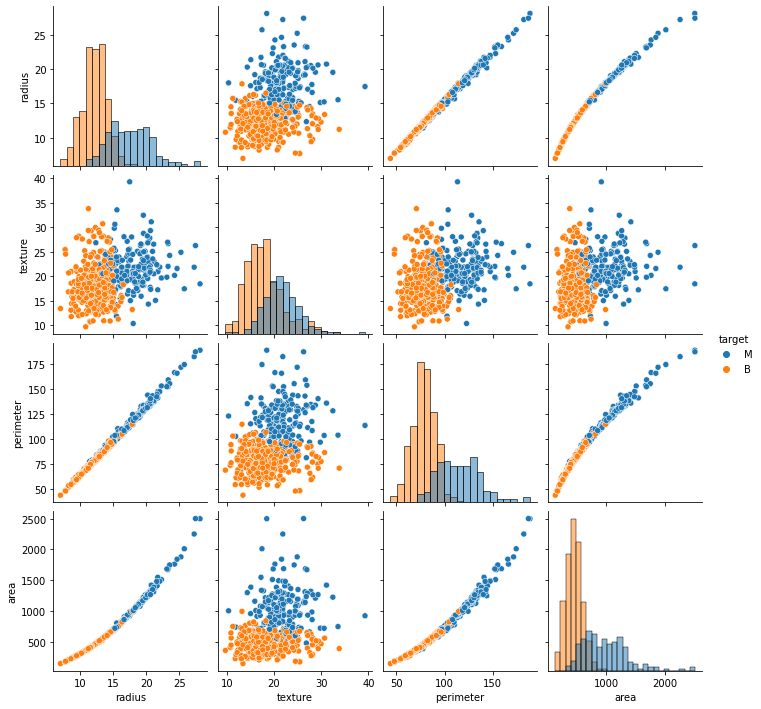

In [19]:
#sns.pairplot(dataset[['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compacity','concavity', 'pts_concavity', 'symmetry', 'fractal','target']], hue="target", diag_kind="hist")
sns.pairplot(dataset[['radius', 'texture', 'perimeter', 'area', 'target']], hue="target", diag_kind="hist")

## 2.	Treinamento do modelo de Rede Neural

### 1)	Com as configurações do modelo MLP previamente definidas no script, faça o treinamento da Rede Neural sem normalizar os atributos numéricos. Comente o resultado obtido, baseado nas métricas de avaliação disponíveis (acurácia, precision, recall, F1-Score, Matriz de confusão, etc.)

#### Rascunho

In [20]:
#Parâmetros do modelo 

hidden_neurons = [15]
activation_layers = ['relu']

output_activation = 'sigmoid'

lr = 0.05
epochs = 50

In [21]:
dataset

,radius,texture,perimeter,area,smoothness,compacity,concavity,pts_concavity,symmetry,fractal,std_radius,std_texture,std_perimeter,std_area,std_smoothness,std_compacity,std_concavity,std_pts_concavity,std_symmetry,std_fractal,minor_radius,minor_texture,minor_perimeter,minor_area,minor_smoothness,minor_compacity,minor_concavity,minor_pts_concavity,minor_symmetry,minor_fractal,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [22]:
new_df = transform_data(dataset,dataset_columns,normalize=False)
new_df.head()

,radius,texture,perimeter,area,smoothness,compacity,concavity,pts_concavity,symmetry,fractal,std_radius,std_texture,std_perimeter,std_area,std_smoothness,std_compacity,std_concavity,std_pts_concavity,std_symmetry,std_fractal,minor_radius,minor_texture,minor_perimeter,minor_area,minor_smoothness,minor_compacity,minor_concavity,minor_pts_concavity,minor_symmetry,minor_fractal,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [23]:
X = new_df.values[:,:-1].astype('float')
target = new_df.values[:,-1]

encoder = LabelEncoder()
Y = encoder.fit_transform(target)

n_input = X.shape[1]
n_output = 1

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [25]:
#x_train.shape

In [26]:
model = create_model(hidden_neurons=hidden_neurons,output_activation=output_activation,n_input=n_input,n_output=n_output, lr = lr)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                465       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


#### Resposta

In [28]:
model.fit(x=x_train,y=y_train,epochs=epochs,validation_split=0.0) # treinar a rede

Epoch 1/50
15/15 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 5/50
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 6/50
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 7/50
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 8/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 10/50
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+0

In [29]:
raw_Y_pred = model.predict(x_test)
y_pred = np.where(raw_Y_pred > 0.5, 1, 0)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Classification Report')
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

Confusion Matrix
[[71  0]
 [43  0]]
Classification Report
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 15.0, 'Predicted')

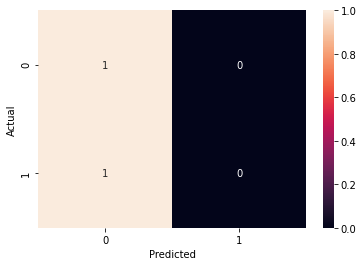

In [31]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn,annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

### 2)	Agora normalize os dados de entrada e treine novamente o modelo MLP. Avalie os resultados obtidos e comente o efeito da normalização no treinamento da Rede Neural.

#### Rascunho

In [32]:
new_df = transform_data(dataset,dataset_columns,normalize=True)
new_df.head()

,radius,texture,perimeter,area,smoothness,compacity,concavity,pts_concavity,symmetry,fractal,std_radius,std_texture,std_perimeter,std_area,std_smoothness,std_compacity,std_concavity,std_pts_concavity,std_symmetry,std_fractal,minor_radius,minor_texture,minor_perimeter,minor_area,minor_smoothness,minor_compacity,minor_concavity,minor_pts_concavity,minor_symmetry,minor_fractal,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,M
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,M
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,M
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,M
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,M


In [33]:
#del model 


#### Resposta

In [34]:
model.fit(x=x_train,y=y_train,epochs=epochs) # treinar a rede


Epoch 1/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 8/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 9/50
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 10/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+0

In [35]:
raw_Y_pred = model.predict(x_test)
y_pred = np.where(raw_Y_pred > 0.5, 1, 0)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Classification Report')
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

Confusion Matrix
[[71  0]
 [43  0]]
Classification Report
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 15.0, 'Predicted')

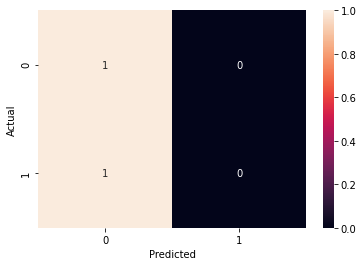

In [36]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn,annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

## Parte III - Mudança de configurações do modelo

### 1)	Insira o conjunto de validação para o treinamento do modelo. Avalie o resultado obtido.

#### Rascunho

In [37]:
#del model


In [38]:
#Parâmetros do modelo 

hidden_neurons = [15]
activation_layers = ['relu']

output_activation = 'sigmoid'

lr = 0.05
epochs = 50

In [39]:
dataset

,radius,texture,perimeter,area,smoothness,compacity,concavity,pts_concavity,symmetry,fractal,std_radius,std_texture,std_perimeter,std_area,std_smoothness,std_compacity,std_concavity,std_pts_concavity,std_symmetry,std_fractal,minor_radius,minor_texture,minor_perimeter,minor_area,minor_smoothness,minor_compacity,minor_concavity,minor_pts_concavity,minor_symmetry,minor_fractal,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [40]:
dataset_columns

{'ID': 'categorical',
 'area': 'numeric',
 'compacity': 'numeric',
 'concavity': 'numeric',
 'fractal': 'numeric',
 'minor_area': 'numeric',
 'minor_compacity': 'numeric',
 'minor_concavity': 'numeric',
 'minor_fractal': 'numeric',
 'minor_perimeter': 'numeric',
 'minor_pts_concavity': 'numeric',
 'minor_radius': 'numeric',
 'minor_smoothness': 'numeric',
 'minor_symmetry': 'numeric',
 'minor_texture': 'numeric',
 'perimeter': 'numeric',
 'pts_concavity': 'numeric',
 'radius': 'numeric',
 'smoothness': 'numeric',
 'std_area': 'numeric',
 'std_compacity': 'numeric',
 'std_concavity': 'numeric',
 'std_fractal': 'numeric',
 'std_perimeter': 'numeric',
 'std_pts_concavity': 'numeric',
 'std_radius': 'numeric',
 'std_smoothness': 'numeric',
 'std_symmetry': 'numeric',
 'std_texture': 'numeric',
 'symmetry': 'numeric',
 'target': 'target',
 'texture': 'numeric'}

In [41]:
new_df = transform_data(dataset,dataset_columns,normalize=True)
new_df.head()

,radius,texture,perimeter,area,smoothness,compacity,concavity,pts_concavity,symmetry,fractal,std_radius,std_texture,std_perimeter,std_area,std_smoothness,std_compacity,std_concavity,std_pts_concavity,std_symmetry,std_fractal,minor_radius,minor_texture,minor_perimeter,minor_area,minor_smoothness,minor_compacity,minor_concavity,minor_pts_concavity,minor_symmetry,minor_fractal,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,M
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,M
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,M
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,M
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,M


In [42]:
X = new_df.values[:,:-1].astype('float')
target = new_df.values[:,-1]

encoder = LabelEncoder()
Y = encoder.fit_transform(target)

n_input = X.shape[1]
n_output = 1

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [44]:
model = create_model(hidden_neurons=hidden_neurons,output_activation=output_activation,n_input=n_input,n_output=n_output, lr = lr)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


#### Resposta

In [45]:
model.add(Dense(2, input_dim=2, activation='relu'))

### 2)	Modifique o tempo de treinamento (épocas) da Rede Neural. Escolha dois valores distintos (e.g. 1 e 1000 épocas) e avalie os resultados.

#### Rascunho

In [46]:
#Parâmetros do modelo 

hidden_neurons = [15]
activation_layers = ['relu']

output_activation = 'sigmoid'

lr = 0.05
epochs = 50

In [47]:
dataset

,radius,texture,perimeter,area,smoothness,compacity,concavity,pts_concavity,symmetry,fractal,std_radius,std_texture,std_perimeter,std_area,std_smoothness,std_compacity,std_concavity,std_pts_concavity,std_symmetry,std_fractal,minor_radius,minor_texture,minor_perimeter,minor_area,minor_smoothness,minor_compacity,minor_concavity,minor_pts_concavity,minor_symmetry,minor_fractal,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [48]:
new_df = transform_data(dataset,dataset_columns,normalize=True)
new_df.head()

,radius,texture,perimeter,area,smoothness,compacity,concavity,pts_concavity,symmetry,fractal,std_radius,std_texture,std_perimeter,std_area,std_smoothness,std_compacity,std_concavity,std_pts_concavity,std_symmetry,std_fractal,minor_radius,minor_texture,minor_perimeter,minor_area,minor_smoothness,minor_compacity,minor_concavity,minor_pts_concavity,minor_symmetry,minor_fractal,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,M
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,M
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,M
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,M
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,M


In [49]:
X = new_df.values[:,:-1].astype('float')
target = new_df.values[:,-1]

encoder = LabelEncoder()
Y = encoder.fit_transform(target)

n_input = X.shape[1]
n_output = 1

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [51]:
x_train.shape

(455, 30)

In [52]:
model = create_model(hidden_neurons=hidden_neurons,output_activation=output_activation,n_input=n_input,n_output=n_output, lr = lr)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 16        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(x=x_train,y=y_train,epochs=epochs,validation_split=0.0) # treinar a rede

Epoch 1/50
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6198
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 7/50
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 8/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 10/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+0

In [56]:
model.fit(x=x_train,y=y_train,epochs=1000,validation_split=0.0) # treinar a rede

Epoch 1/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 2/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 7/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 8/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 9/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 10/1000
15/15 [==============================] - 0s 2ms/st

#### Resposta

In [57]:
model.fit(x=x_train,y=y_train,epochs=1000,validation_split=0.0) # treinar a rede

Epoch 1/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 4/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 5/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 6/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 7/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 8/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 9/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 10/1000
15/15 [==============================] - 0s 2ms/st

In [58]:
raw_Y_pred = model.predict(x_test)
y_pred = np.where(raw_Y_pred > 0.5, 1, 0)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Classification Report')
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

Confusion Matrix
[[71  0]
 [43  0]]
Classification Report
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 15.0, 'Predicted')

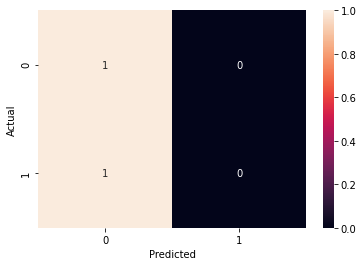

In [59]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn,annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

### 3)	 Modifique a taxa de aprendizado da Rede Neural. Escolha dois valores distintos (e.g. 0,001 e 0,1) e avalie os resultados.

#### Rascunho

In [60]:
#Parâmetros do modelo 

hidden_neurons = [15]
activation_layers = ['relu']

output_activation = 'sigmoid'

lr = 0.01
epochs = 50 

#### Resposta

In [61]:
model.fit(x=x_train,y=y_train,epochs=1000,validation_split=0.0) # treinar a rede

Epoch 1/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 3/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 4/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 8/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 9/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6286
Epoch 10/1000
15/15 [==============================] - 0s 2ms/st

In [62]:
raw_Y_pred = model.predict(x_test)
y_pred = np.where(raw_Y_pred > 0.5, 1, 0)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Classification Report')
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

Confusion Matrix
[[71  0]
 [43  0]]
Classification Report
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 15.0, 'Predicted')

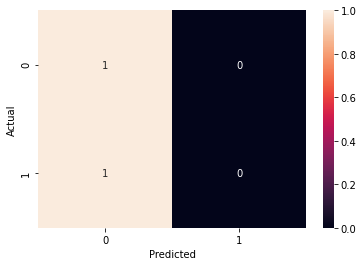

In [63]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn,annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

### 4)	Modifique a quantidade de neurônios na camada escondida da Rede Neural. Escolha dois valores distintos (e.g. 2 e 70 neurônios) e avalie os resultados.

#### Rascunho

In [64]:
#Parâmetros do modelo 

hidden_neurons = [15]
activation_layers = ['relu']

output_activation = 'sigmoid'

lr = 0.05
epochs = 50 

In [65]:
dataset

,radius,texture,perimeter,area,smoothness,compacity,concavity,pts_concavity,symmetry,fractal,std_radius,std_texture,std_perimeter,std_area,std_smoothness,std_compacity,std_concavity,std_pts_concavity,std_symmetry,std_fractal,minor_radius,minor_texture,minor_perimeter,minor_area,minor_smoothness,minor_compacity,minor_concavity,minor_pts_concavity,minor_symmetry,minor_fractal,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [66]:
new_df = transform_data(dataset,dataset_columns,normalize=True)
new_df.head()

,radius,texture,perimeter,area,smoothness,compacity,concavity,pts_concavity,symmetry,fractal,std_radius,std_texture,std_perimeter,std_area,std_smoothness,std_compacity,std_concavity,std_pts_concavity,std_symmetry,std_fractal,minor_radius,minor_texture,minor_perimeter,minor_area,minor_smoothness,minor_compacity,minor_concavity,minor_pts_concavity,minor_symmetry,minor_fractal,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,M
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,M
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,M
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,M
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,M


In [67]:
X = new_df.values[:,:-1].astype('float')
target = new_df.values[:,-1]

encoder = LabelEncoder()
Y = encoder.fit_transform(target)

n_input = X.shape[1]
n_output = 1

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

#### Resposta

In [69]:
model.add(Dense(2, input_dim=2, activation='relu'))

In [70]:
model.add(Dense(100, input_dim=2, activation='relu'))

## Parte IV - Análise dos resultados

### 1)	Faça novos testes para avaliar o desempenho da Rede Neural no problema designado. Use a técnica K-Fold (com K = 10) para analisar o resultado obtido.

#### Rascunho

#### Resposta

In [ ]:
new_df = transform_data(dataset,dataset_columns,normalize=False)
new_df.head()

model = create_model(hidden_neurons=hidden_neurons,output_activation=output_activation,n_input=n_input,n_output=n_output, lr = lr)
model.fit(x=x_train,y=y_train,epochs=epochs,validation_split=0.0) # treinar a rede# treinar a rede
    
    # fit and evaluate here.

if __name__ == "__main__":
    n_folds = 10
    data, labels, header_info = load_data()
    skf = StratifiedKFold(labels, n_folds=n_folds, shuffle=True)

    for i, (train, test) in enumerate(skf):
           
            model = None # Clearing the NN.
            model = create_model()
            x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

### 2)	Faça análises e novas implementações que você julgue importante para o seu trabalho. Não esqueça de explicar a motivação da análise realizada. 

#### Rascunho

#### Resposta